<a href="https://colab.research.google.com/github/Swetharr2003/eda-da-/blob/main/edada_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
file_path="/content/drive/MyDrive/dataset/1000 Sales Records.csv"
df=pd.read_csv(file_path)
print(df.head())

                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.20  2224085.18    1468506.02 

In [ ]:
#dimension
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (1000, 14)


In [ ]:
# Summary of the dataset (data types, non-null counts)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [ ]:
# Statistical Summary of numerical features
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
           Order ID   Units Sold  Unit Price    Unit Cost  Total Revenue  \
count  1.000000e+03  1000.000000  1000.00000  1000.000000   1.000000e+03   
mean   5.496813e+08  5053.988000   262.10684   184.965110   1.327322e+06   
std    2.571334e+08  2901.375317   216.02106   175.289311   1.486515e+06   
min    1.029280e+08    13.000000     9.33000     6.920000   2.043250e+03   
25%    3.280740e+08  2420.250000    81.73000    56.670000   2.811919e+05   
50%    5.566097e+08  5184.000000   154.06000    97.440000   7.549392e+05   
75%    7.696945e+08  7536.750000   421.89000   263.330000   1.733503e+06   
max    9.955298e+08  9998.000000   668.27000   524.960000   6.617210e+06   

         Total Cost  Total Profit  
count  1.000000e+03  1.000000e+03  
mean   9.361192e+05  3.912026e+05  
std    1.162571e+06  3.836402e+05  
min    1.416750e+03  5.326100e+02  
25%    1.649319e+05  9.837612e+04  
50%    4.647261e+05  2.772260e+05  
75%    1.141750e+06  5.484568e+05  
max  

In [ ]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
#Data Handling and Cleaning
# Dropping duplicates
data = df.drop_duplicates()
data

Region               Country   Item Type  \
0    Middle East and North Africa                 Libya   Cosmetics   
1                   North America                Canada  Vegetables   
2    Middle East and North Africa                 Libya   Baby Food   
3                            Asia                 Japan      Cereal   
4              Sub-Saharan Africa                  Chad      Fruits   
..                            ...                   ...         ...   
995  Middle East and North Africa            Azerbaijan      Snacks   
996                        Europe               Georgia   Baby Food   
997  Middle East and North Africa  United Arab Emirates  Vegetables   
998                        Europe               Finland   Household   
999                        Europe              Portugal      Cereal   

    Sales Channel Order Priority  Order Date   Order ID   Ship Date  \
0         Offline              M  10/18/2014  686800706  10/31/2014   
1          Online              M   11/7/2011  185941302   12/8/2011   
2         Offline              C  10/31/2016  246222341   12/9/2016   
3         Offline              C   4/10/2010  161442649   5/12/2010   
4         Offline              H   8/16/2011  645713555   8/31/2011   
..            ...            ...         ...        ...         ...   
995       Offline              C   4/18/2010  534085166   4/25/2010   
996       Offline              H    8/1/2011  590768182    9/7/2011   
997        Online              C   5/12/2011  524363124   6/28/2011   
998       Offline              L   1/25/2016  289606320   2/14/2016   
999       Offline              C   4/10/2014  811546599    5/8/2014   

     Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
0          8446      437.20     263.33     3692591.20  2224085.18   
1          3018      154.06      90.93      464953.08   274426.74   
2          1517      255.28     159.42      387259.76   241840.14   
3          3322      205.70     117.11      683335.40   389039.42   
4          9845        9.33       6.92       91853.85    68127.40   
..          ...         ...        ...            ...         ...   
995        6524      152.58      97.44      995431.92   635698.56   
996         288      255.28     159.42       73520.64    45912.96   
997        9556      154.06      90.93     1472197.36   868927.08   
998        9801      668.27     502.54     6549714.27  4925394.54   
999        3528      205.70     117.11      725709.60   413164.08   

     Total Profit  
0      1468506.02  
1       190526.34  
2       145419.62  
3       294295.98  
4        23726.45  
..            ...  
995     359733.36  
996      27607.68  
997     603270.28  
998    1624319.73  
999     312545.52  

[1000 rows x 14 columns]

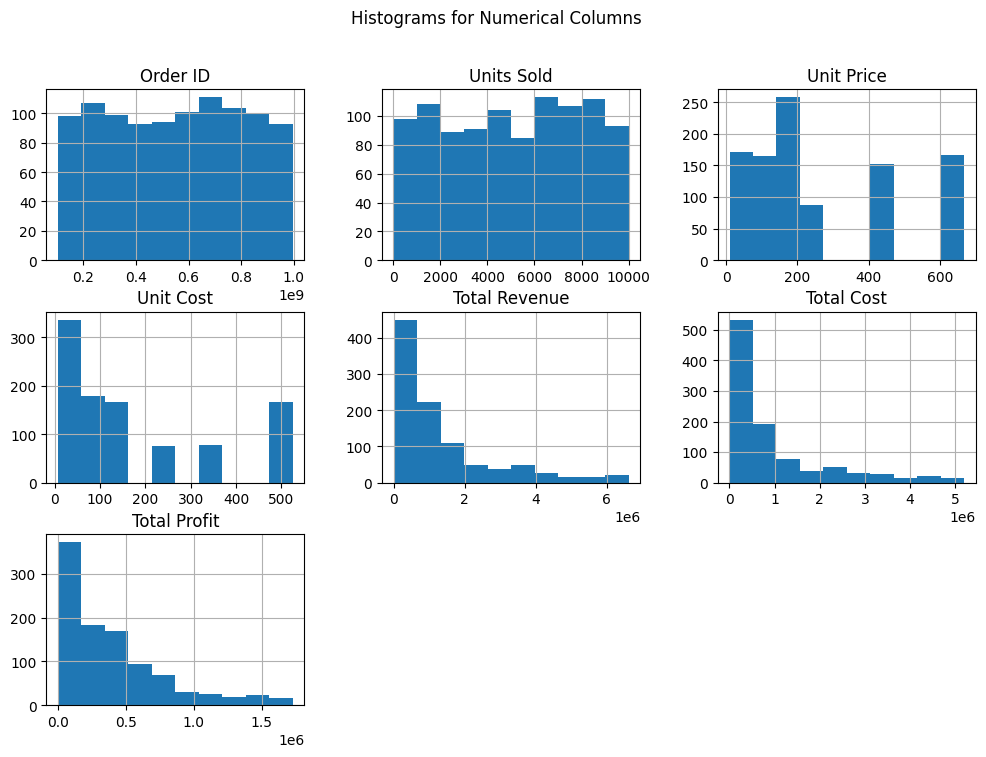

In [ ]:
#Univariate Analysis

# Histograms for numerical columns
data.hist(figsize=(12, 8))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

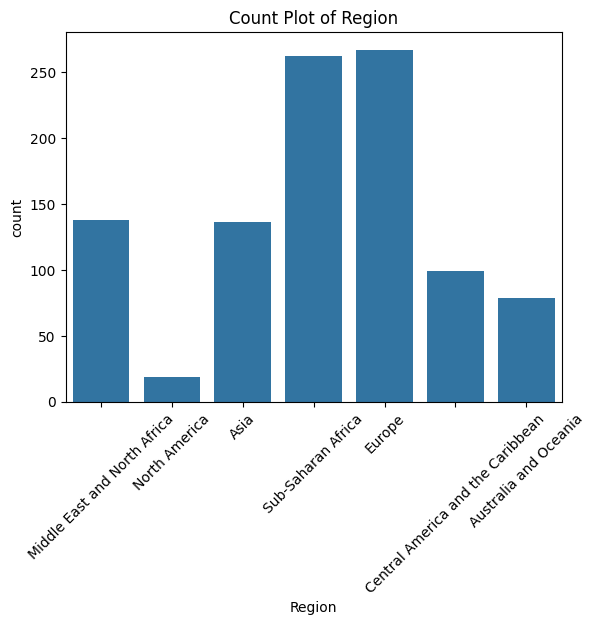

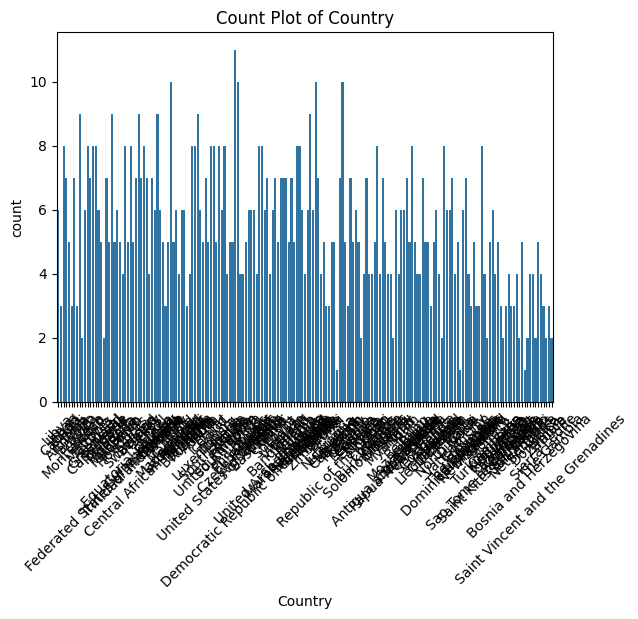

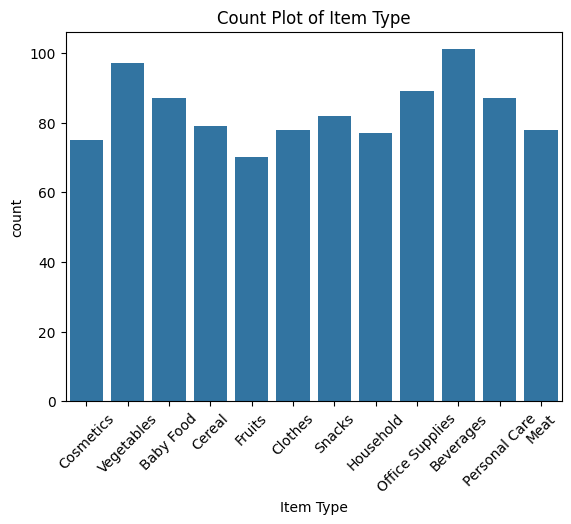

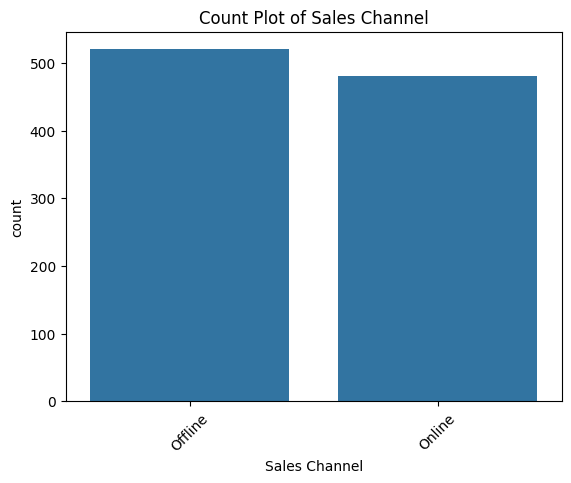

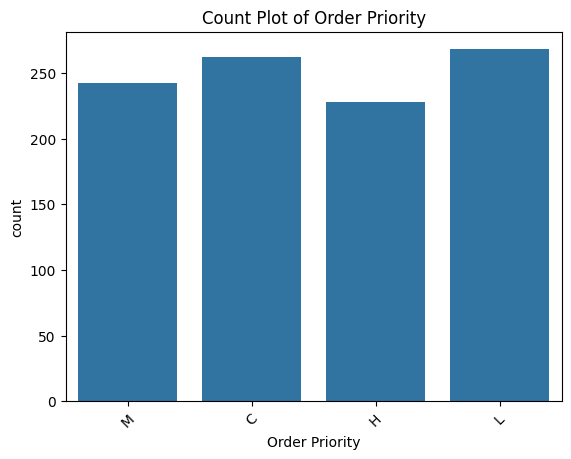

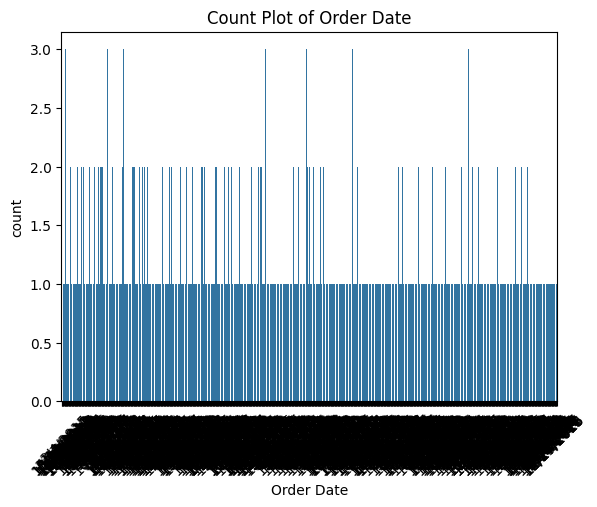

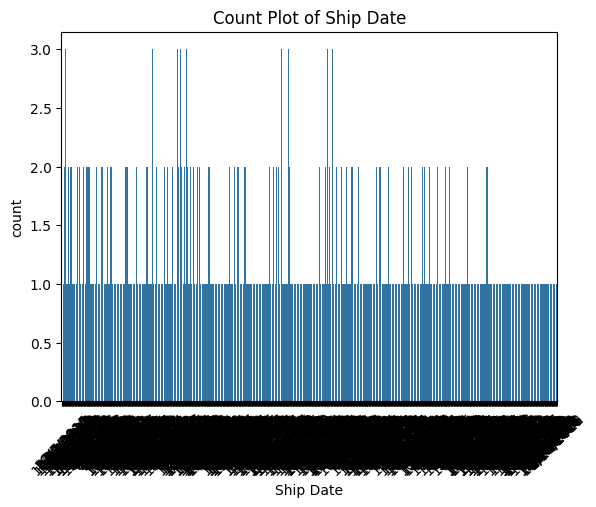

In [ ]:
# Count plot for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

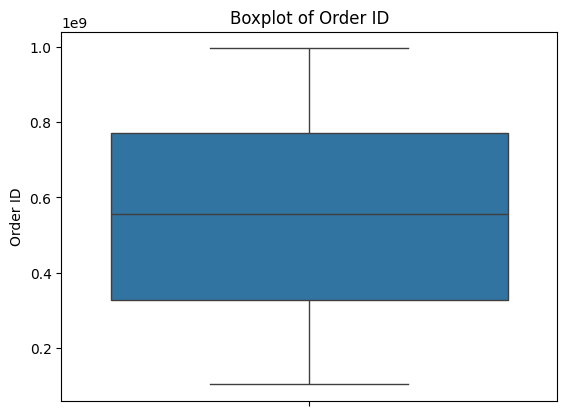

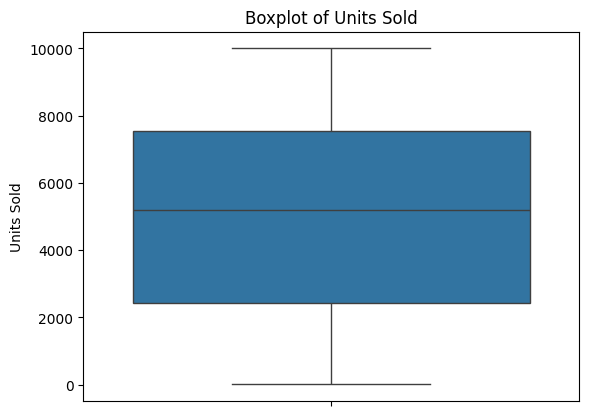

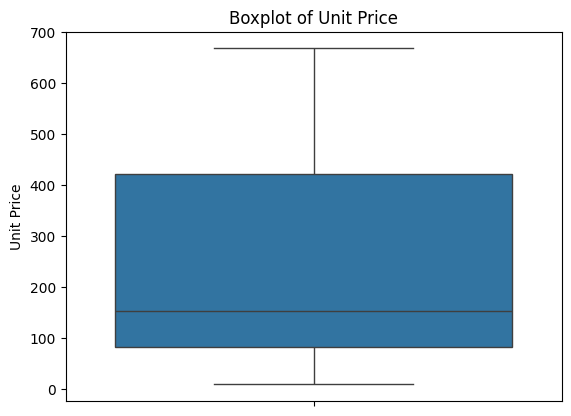

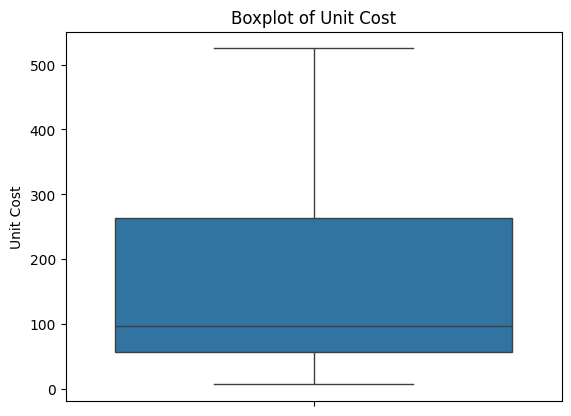

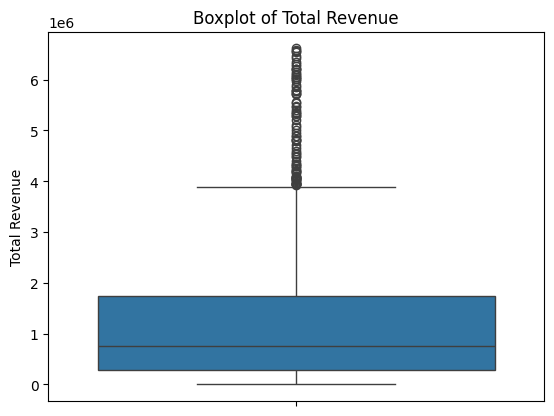

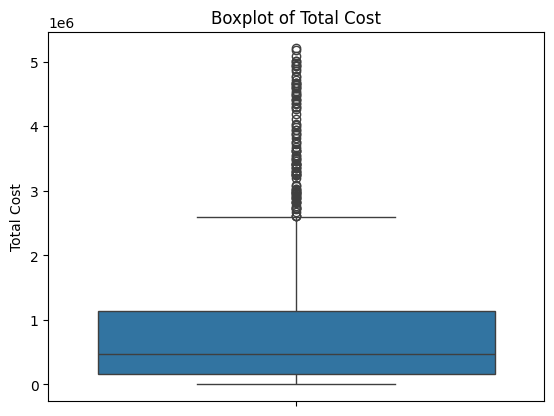

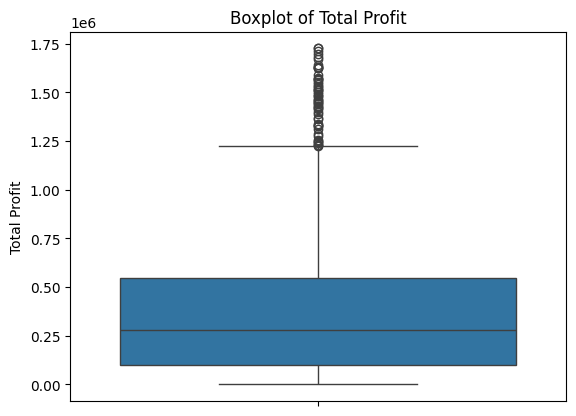

In [ ]:
# Boxplot for detecting outliers in numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

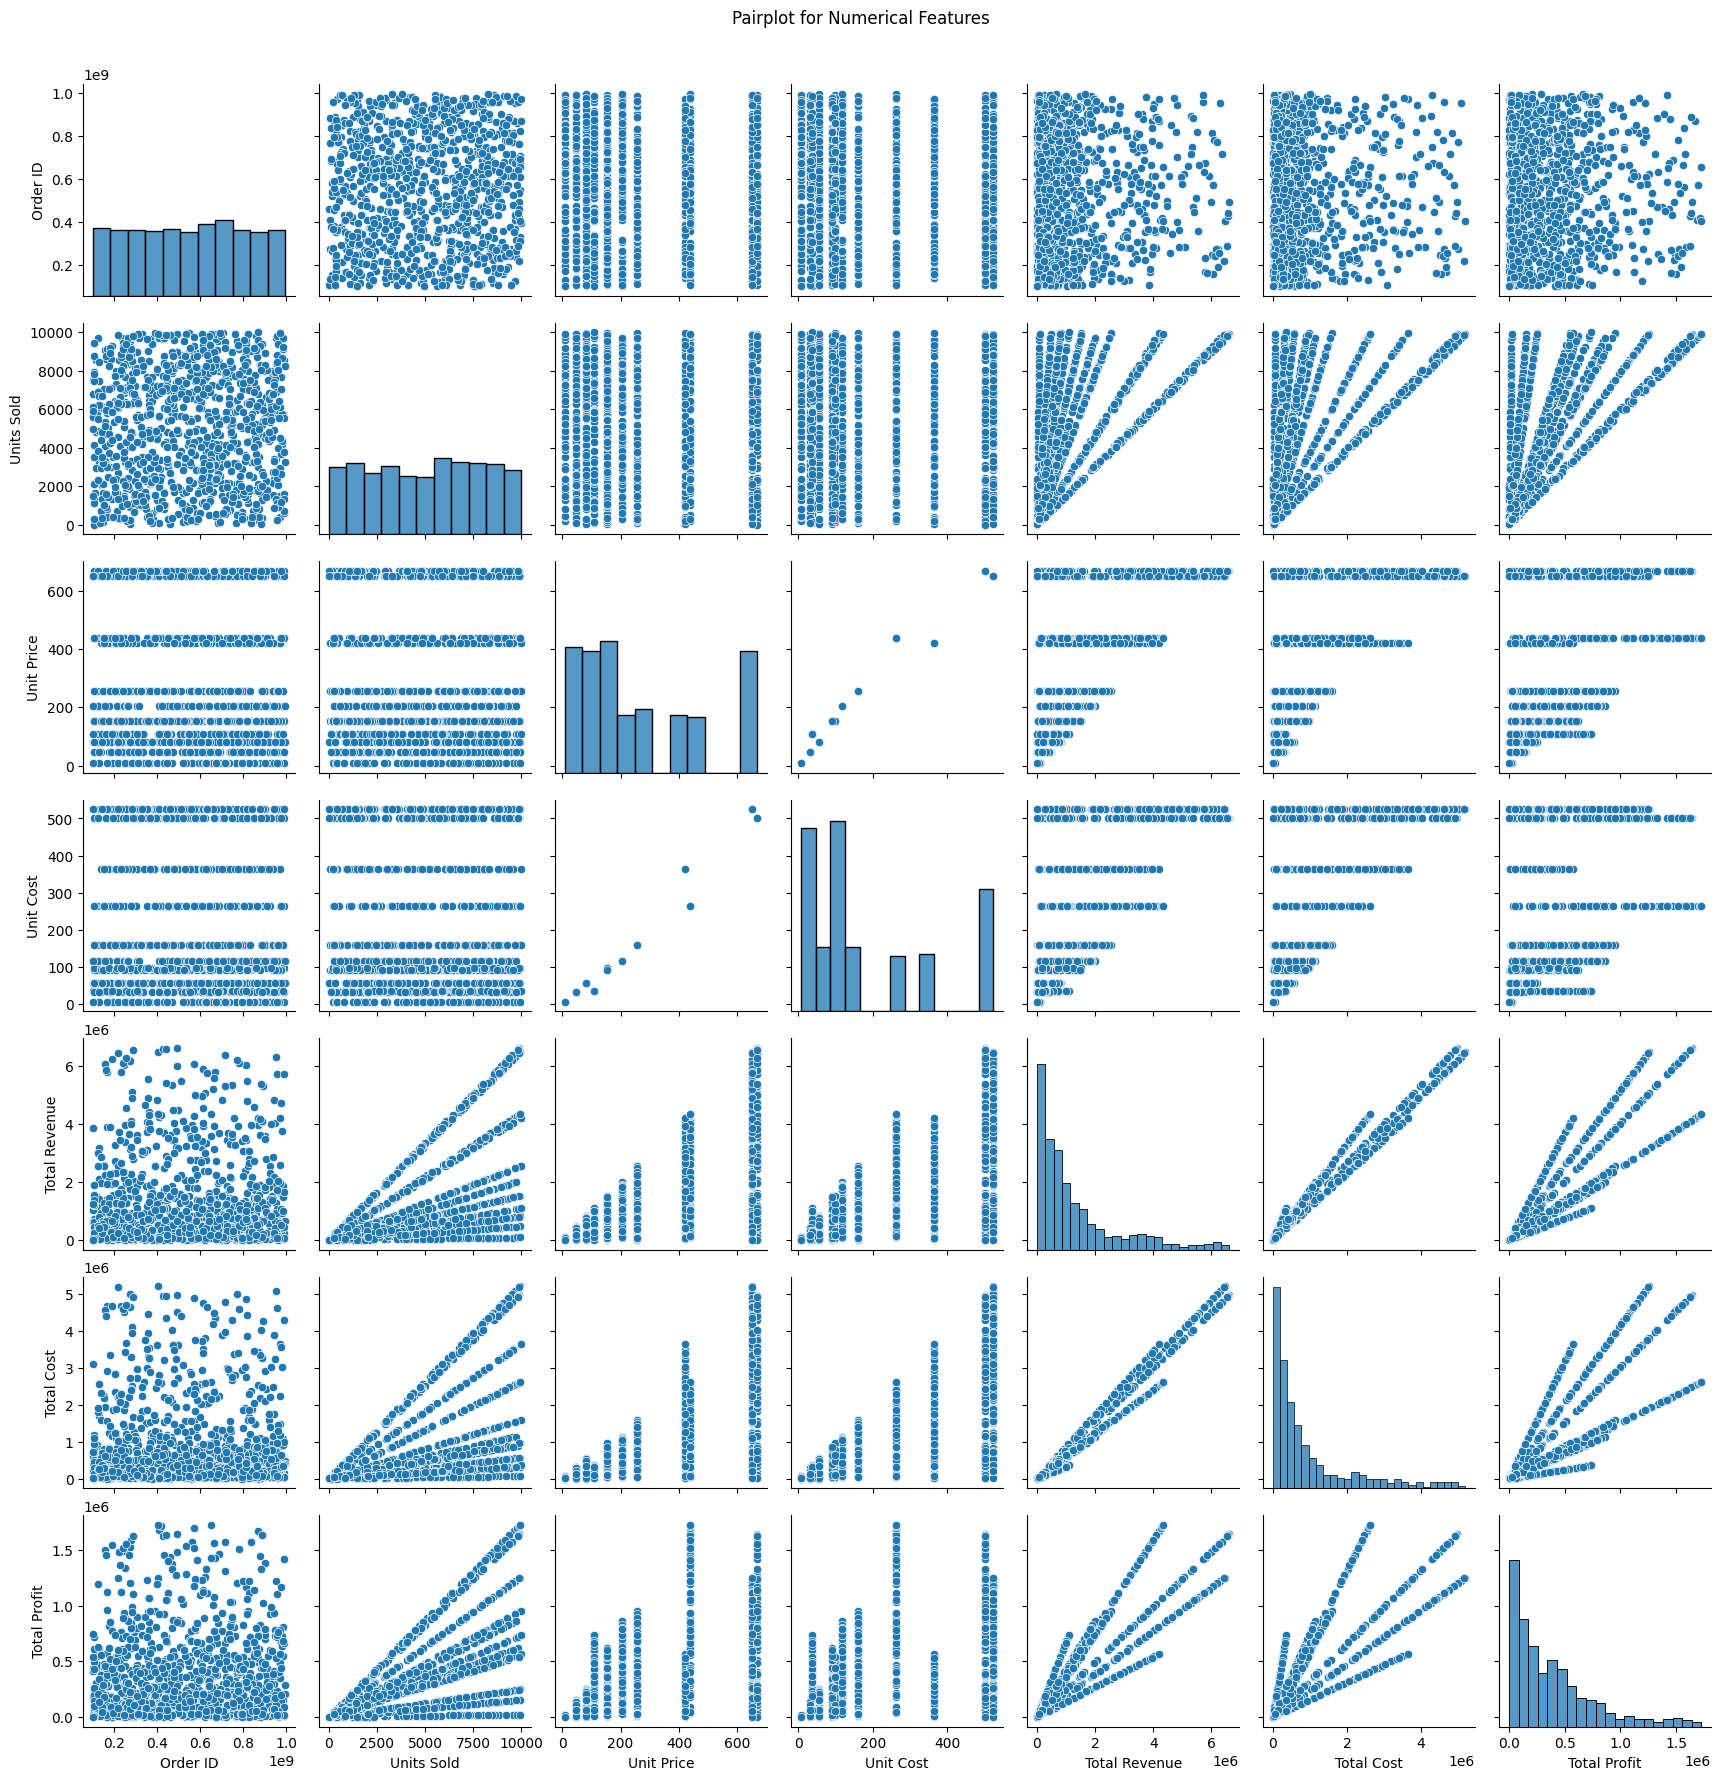

In [ ]:
#Bivariate Analysis (Two Variable Analysis)
# Pairplot for numerical columns to see pairwise relationships
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()


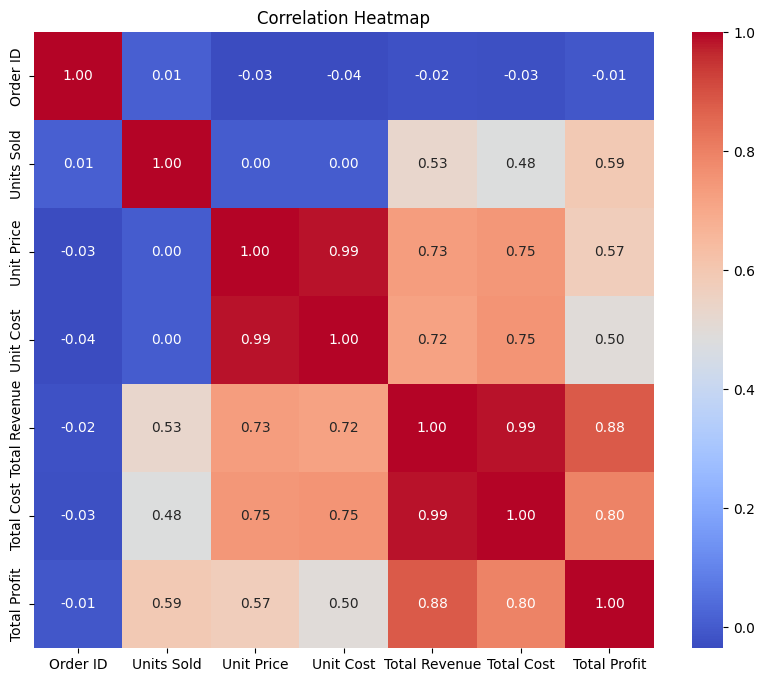

In [ ]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Step 3: Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Multivariate Analysis (More Than Two Variables)

# Check the column names in your dataset
print("Column Names in the Dataset:")
print(data.columns)

# Replace 'categorical_column' with an actual column name from the output above
# For example, if 'Category' is a categorical column in your dataset:
categorical_column = 'Category'  # Replace this with your actual categorical column name

# Count Plots for Categorical Columns
# Plotting count plots for each categorical column to see the frequency of each category
if categorical_column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[categorical_column], order=data[categorical_column].value_counts().index)
    plt.title(f'Count Plot of {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel(categorical_column)
    plt.show()
else:
    print(f"The column '{categorical_column}' does not exist in the dataset.")


Column Names in the Dataset:
Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')
The column 'Category' does not exist in the dataset.


In [ ]:
# Import required functions
from scipy.stats import skew, kurtosis

# Checking Skewness and Kurtosis for Numerical Columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Skewness of {column}: {skew(data[column].dropna())}")
    print(f"Kurtosis of {column}: {kurtosis(data[column].dropna())}")


Skewness of Order ID: -0.021246923342593864
Kurtosis of Order ID: -1.1882947495716205
Skewness of Units Sold: -0.05114035861675731
Kurtosis of Units Sold: -1.2211973452253675
Skewness of Unit Price: 0.7908466898141128
Kurtosis of Unit Price: -0.7372249941578772
Skewness of Unit Cost: 0.9466084834310294
Kurtosis of Unit Cost: -0.6026024086943464
Skewness of Total Revenue: 1.6290891896211788
Kurtosis of Total Revenue: 2.0519204970847786
Skewness of Total Cost: 1.795752619324673
Kurtosis of Total Cost: 2.540147975657864
Skewness of Total Profit: 1.4032685278277528
Kurtosis of Total Profit: 1.5903394725714568


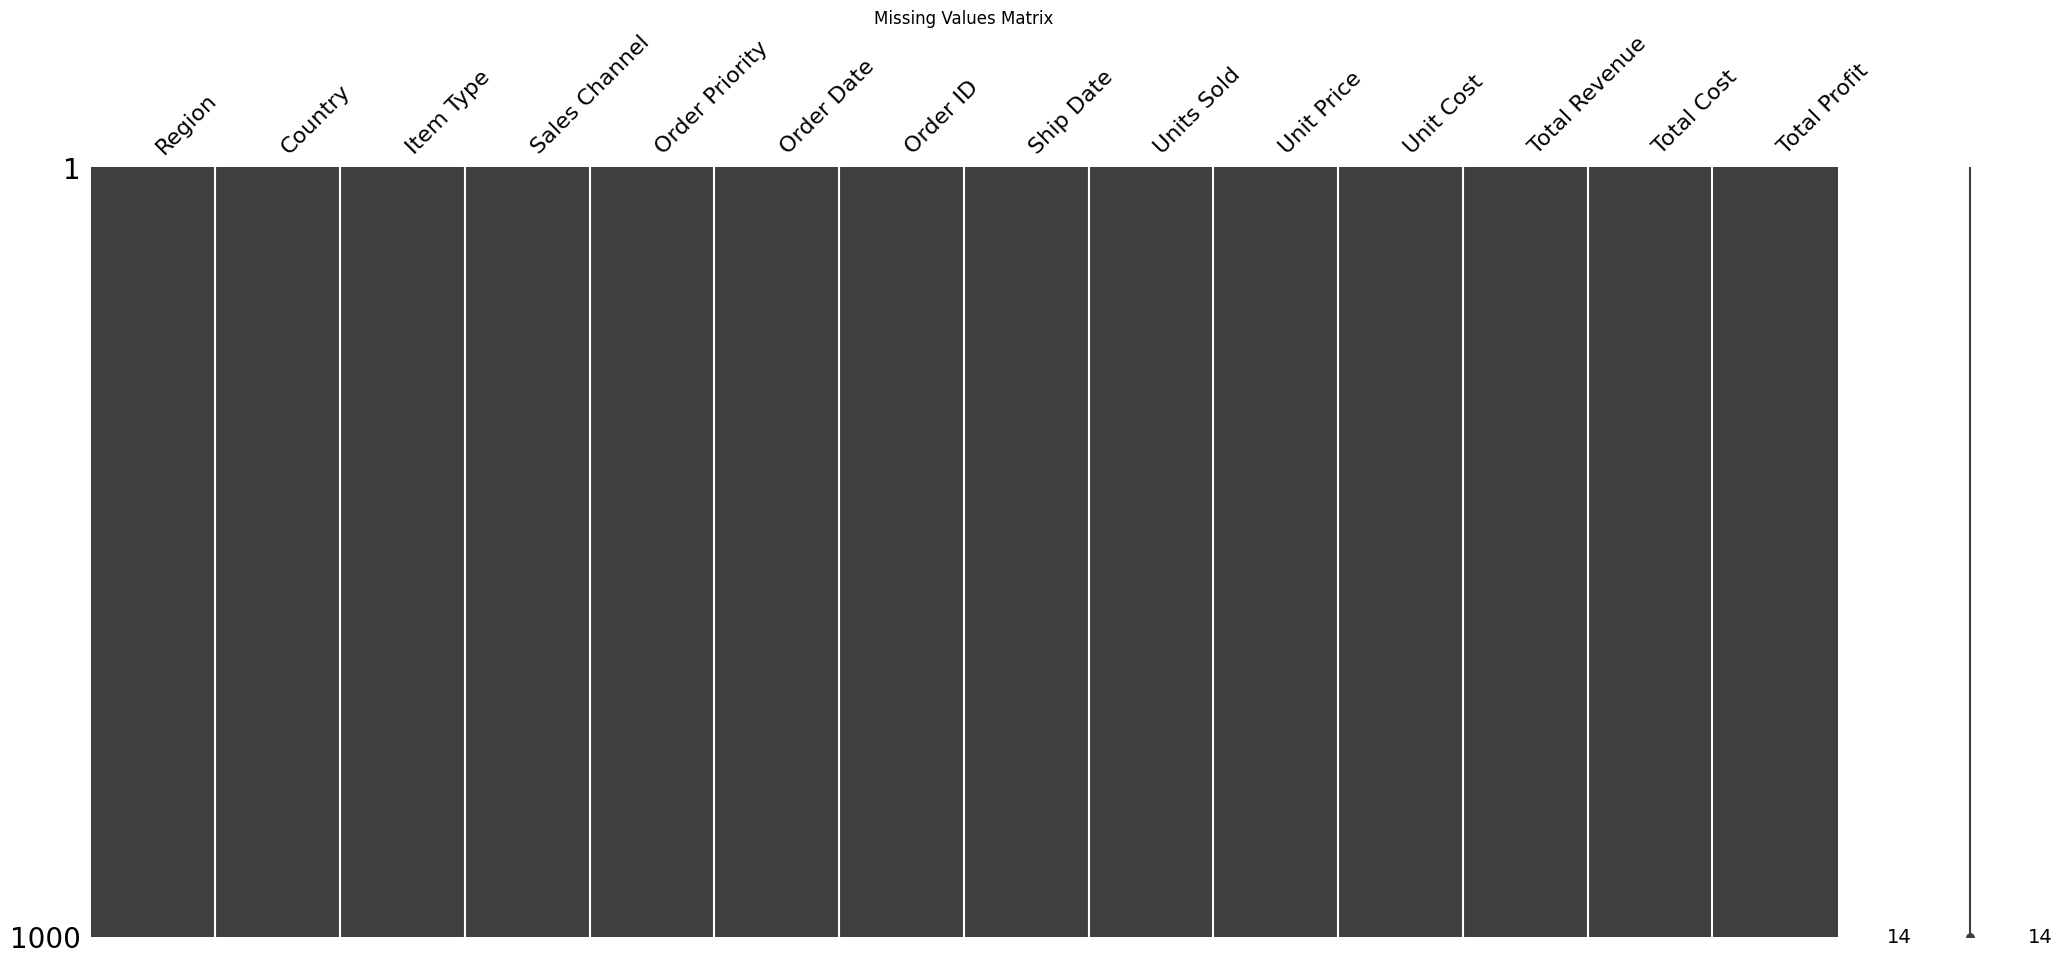

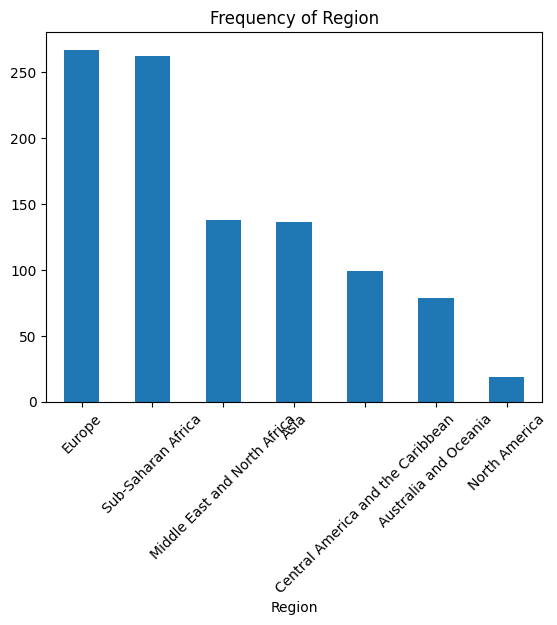

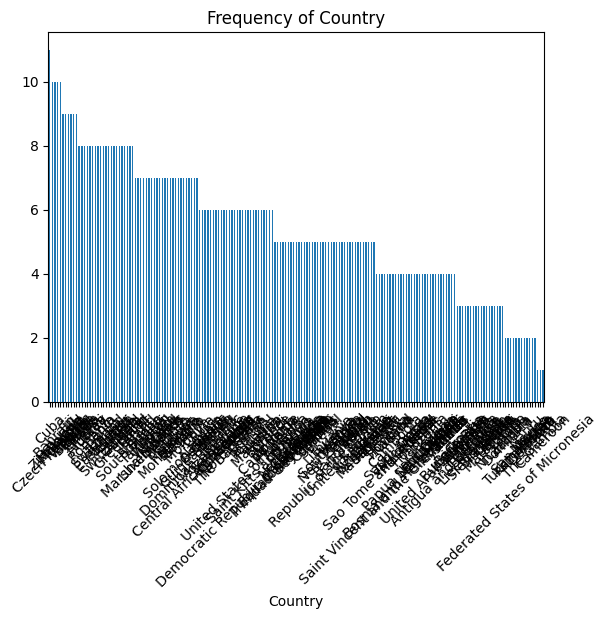

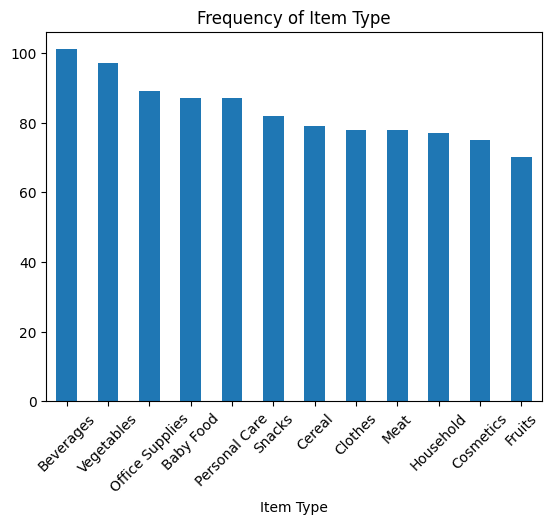

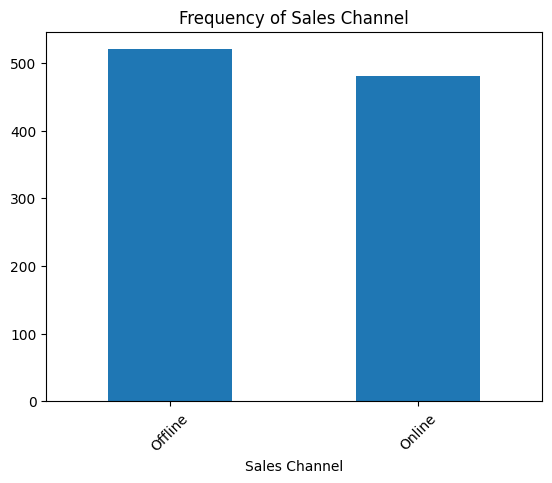

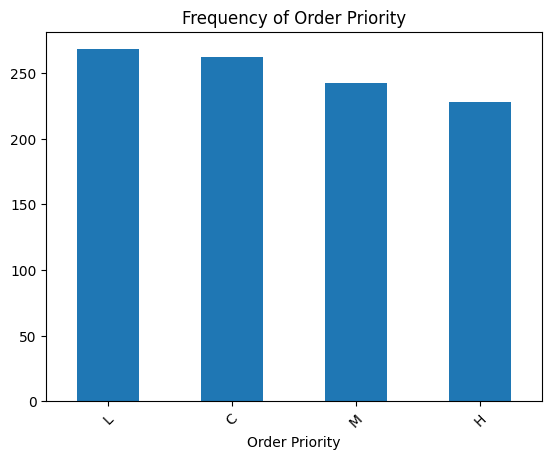

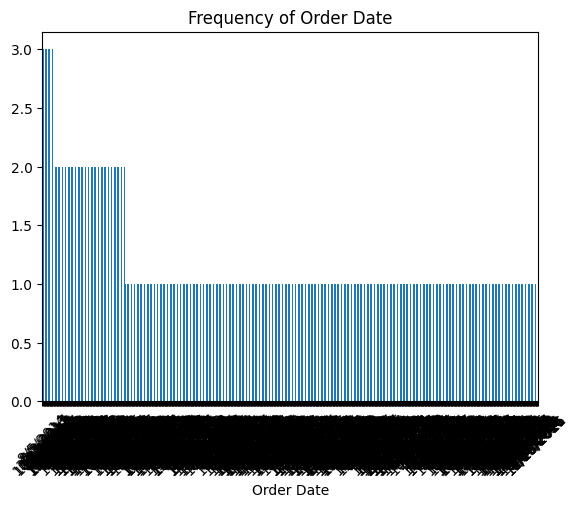

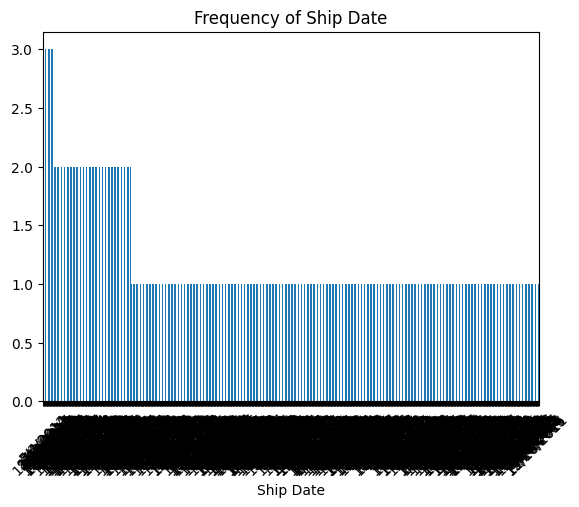

In [ ]:
# Step 8: Visualizing Missing Values (if any)

# Import the missingno library
import missingno as msno

# Step 8: Visualizing Missing Values (if any)
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()


# Optional: Frequency Plot for Categorical Features
for column in data.select_dtypes(include=['object']).columns:
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=45)
    plt.show()

# **MOD 2**

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
# Step 2: Replacing Values (Handling Missing Data)
# Check for missing values
print("Missing values before replacement:\n", df.isnull().sum())

# Impute missing values in numerical columns with mean
num_imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Impute missing values in categorical columns with most frequent value (mode)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

print("Missing values after replacement:\n", df.isnull().sum())

Missing values before replacement:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
Missing values after replacement:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
# Step 3: Discretization and Binning
# Binning 'Units Sold' column into categories: Low, Medium, High
bins = [0, 2000, 5000, np.inf]
labels = ['Low', 'Medium', 'High']
df['Units Sold Category'] = pd.cut(df['Units Sold'], bins=bins, labels=labels)
print(df.head())

                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date     Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706.0  10/31/2014      8446.0      437.20   
1              M   11/7/2011  185941302.0   12/8/2011      3018.0      154.06   
2              C  10/31/2016  246222341.0   12/9/2016      1517.0      255.28   
3              C   4/10/2010  161442649.0   5/12/2010      3322.0      205.70   
4              H   8/16/2011  645713555.0   8/31/2011      9845.0        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit Units Sold Category  
0     263.33     36925

In [ ]:
# Apply MLE or other imputation methods for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'mean' for numerical columns
data['Unit Cost'] = imputer.fit_transform(data[['Total Cost']])
print("Column after mean imputation:\n", data['Unit Cost'])


Column after mean imputation:
 0      2224085.18
1       274426.74
2       241840.14
3       389039.42
4        68127.40
          ...    
995     635698.56
996      45912.96
997     868927.08
998    4925394.54
999     413164.08
Name: Unit Cost, Length: 1000, dtype: float64


# **MOD 3**

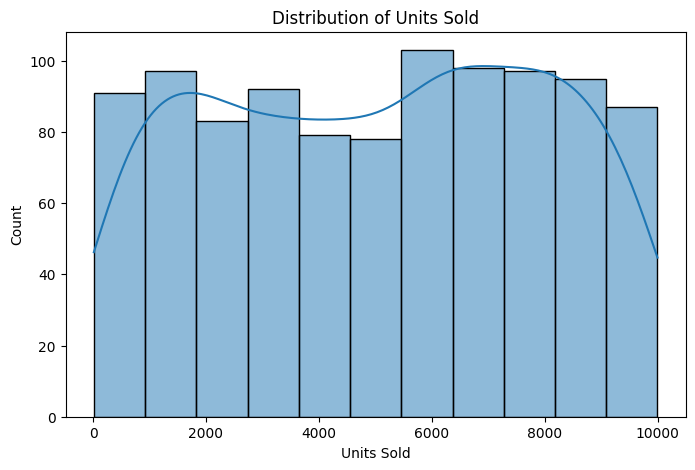

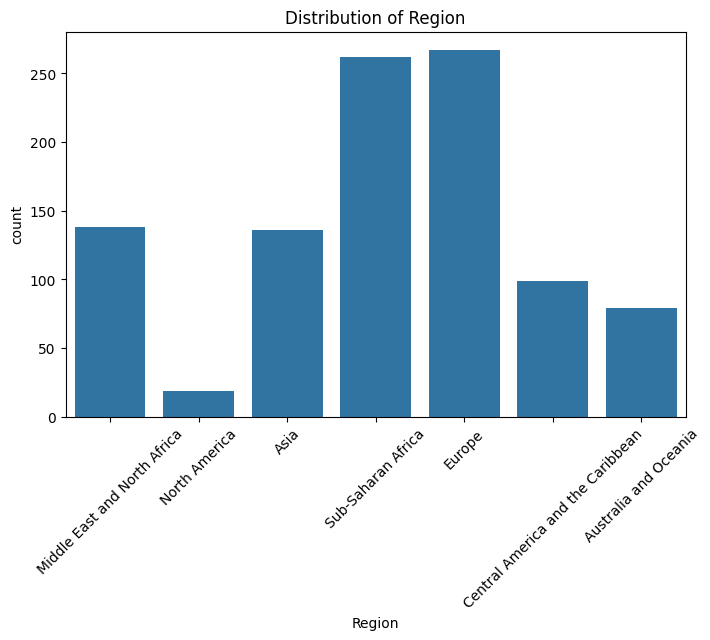

In [ ]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Example for univariate analysis on a numerical column (e.g., 'Units Sold')
plt.figure(figsize=(8, 5))
sns.histplot(data['Units Sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.show()

# Example for a categorical column (e.g., 'Region')
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=data)
plt.title('Distribution of Region')
plt.xticks(rotation=45)
plt.show()


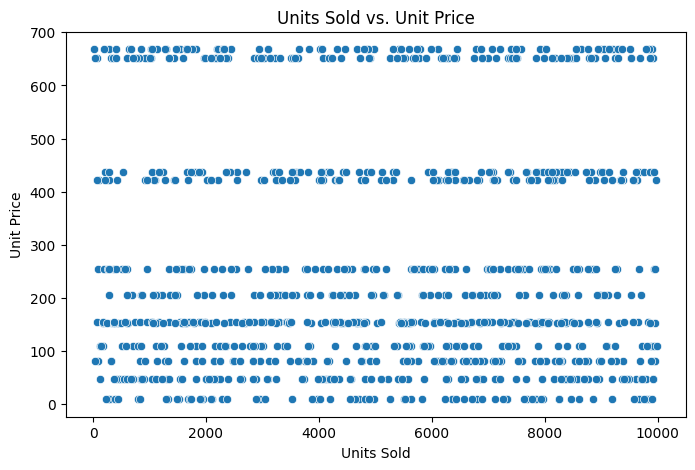

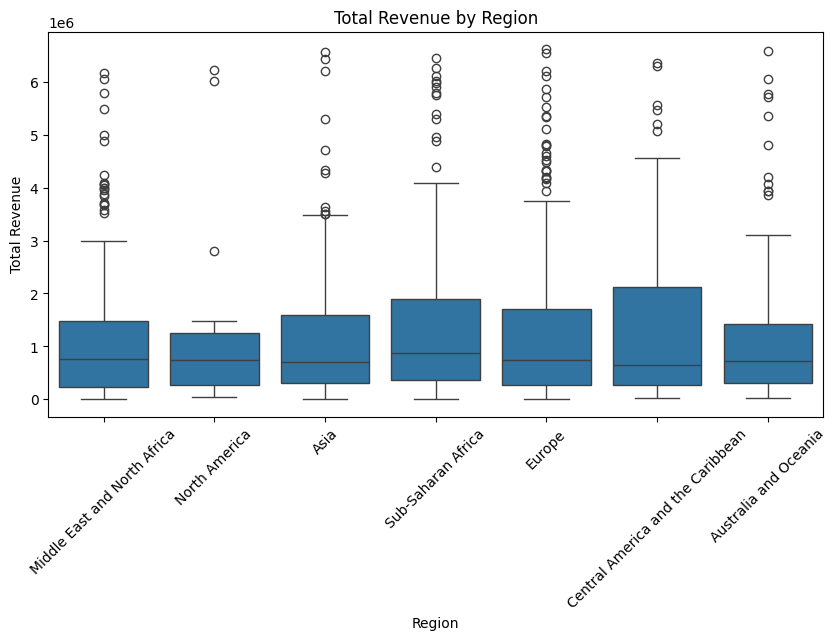

In [ ]:
#Bivariate Analysis
# Scatter plot for two numerical columns (e.g., 'Units Sold' vs 'Unit Price')
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Units Sold', y='Unit Price', data=data)
plt.title('Units Sold vs. Unit Price')
plt.show()

# Boxplot for a categorical column vs a numerical column (e.g., 'Region' vs 'Total Revenue')
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Total Revenue', data=data)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.show()


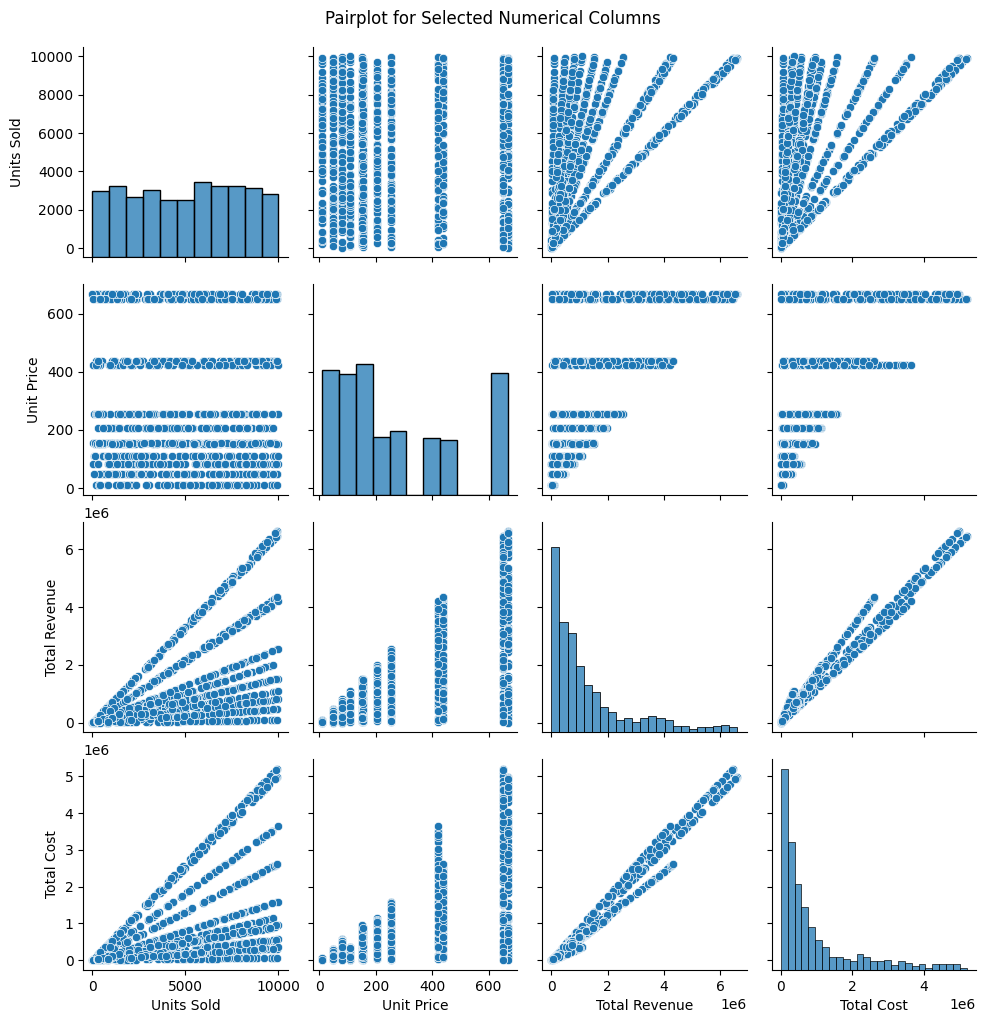

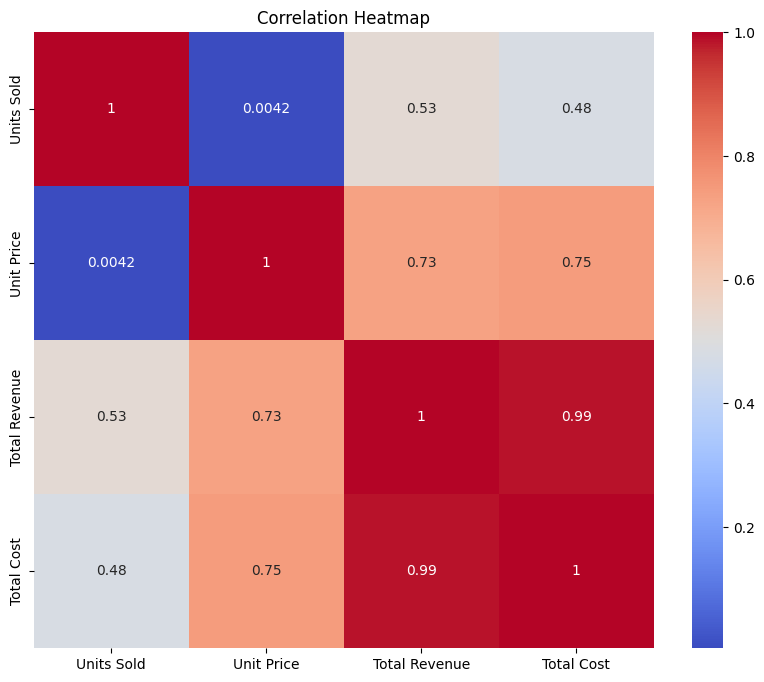

In [ ]:
#Multivariate Analysis
# Pairplot for several numerical columns (e.g., 'Units Sold', 'Unit Price', 'Total Revenue')
sns.pairplot(data[['Units Sold', 'Unit Price', 'Total Revenue', 'Total Cost']])
plt.suptitle('Pairplot for Selected Numerical Columns', y=1.02)
plt.show()

# Heatmap of correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Units Sold', 'Unit Price', 'Total Revenue', 'Total Cost']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**MOD 4**

In [ ]:
# Statistical summary of numerical columns
summary = data.describe()
print("Statistical Summary:\n", summary)

Statistical Summary:
            Order ID  Unit Price     Unit Cost  Total Revenue    Total Cost  \
count  1.000000e+03  1000.00000  1.000000e+03   1.000000e+03  1.000000e+03   
mean   5.496813e+08   262.10684  9.361192e+05   1.327322e+06  9.361192e+05   
std    2.571334e+08   216.02106  1.162571e+06   1.486515e+06  1.162571e+06   
min    1.029280e+08     9.33000  1.416750e+03   2.043250e+03  1.416750e+03   
25%    3.280740e+08    81.73000  1.649319e+05   2.811919e+05  1.649319e+05   
50%    5.566097e+08   154.06000  4.647261e+05   7.549392e+05  4.647261e+05   
75%    7.696945e+08   421.89000  1.141750e+06   1.733503e+06  1.141750e+06   
max    9.955298e+08   668.27000  5.204978e+06   6.617210e+06  5.204978e+06   

       Total Profit  
count  1.000000e+03  
mean   3.912026e+05  
std    3.836402e+05  
min    5.326100e+02  
25%    9.837612e+04  
50%    2.772260e+05  
75%    5.484568e+05  
max    1.726181e+06  


In [ ]:
# Select numerical columns for statistical analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean, median, standard deviation, and variance for each numerical column
for column in numerical_columns:
    mean_value = data[column].mean()
    median_value = data[column].median()
    std_value = data[column].std()
    variance_value = data[column].var()
    skewness_value = data[column].skew()
    kurtosis_value = data[column].kurt()

    print(f"Statistics for {column}:")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {std_value}")
    print(f"  Variance: {variance_value}")
    print(f"  Skewness: {skewness_value}")
    print(f"  Kurtosis: {kurtosis_value}\n")

Statistics for Order ID:
  Mean: 549681324.743
  Median: 556609713.5
  Standard Deviation: 257133358.83775103
  Variance: 6.611756422718364e+16
  Skewness: -0.02127885493359558
  Kurtosis: -1.1882335998746454

Statistics for Unit Price:
  Mean: 262.10684
  Median: 154.06
  Standard Deviation: 216.02106046304345
  Variance: 46665.09856357788
  Skewness: 0.7920352380399907
  Kurtosis: -0.7349003492771731

Statistics for Unit Cost:
  Mean: 936119.2287699999
  Median: 464726.065
  Standard Deviation: 1162570.7525582854
  Variance: 1351570754703.938
  Skewness: 1.7984514212761802
  Kurtosis: 2.558918675374708

Statistics for Total Revenue:
  Mean: 1327321.84033
  Median: 754939.1799999999
  Standard Deviation: 1486514.564803918
  Variance: 2209725551374.1816
  Skewness: 1.6315375163209798
  Kurtosis: 2.068241241926463

Statistics for Total Cost:
  Mean: 936119.2287699999
  Median: 464726.065
  Standard Deviation: 1162570.7525582854
  Variance: 1351570754703.938
  Skewness: 1.798451421276180

In [ ]:
# For 1-D statistical analysis, let's take the 'Sales' column as an example
sales_data = data['Total Profit']  # Replace 'Sales' with any other numerical column

# Measures of central tendency and dispersion
mean_sales = sales_data.mean()
median_sales = sales_data.median()
std_sales = sales_data.std()
variance_sales = sales_data.var()

# Skewness and Kurtosis
skew_sales = sales_data.skew()
kurtosis_sales = sales_data.kurt()

print(f"Mean: {mean_sales}, Median: {median_sales}, Standard Deviation: {std_sales}, Variance: {variance_sales}")
print(f"Skewness: {skew_sales}, Kurtosis: {kurtosis_sales}")


Mean: 391202.61155999993, Median: 277225.98, Standard Deviation: 383640.1858646798, Variance: 147179792210.28607
Skewness: 1.4053774730135409, Kurtosis: 1.6043439760483698


In [ ]:
# 2D Statistical analysis: Correlation between 'Sales' and 'Profit'
correlation = data[['Total Profit', 'Total Cost']].corr()
print("Correlation between Sales and Profit:\n", correlation)


Correlation between Sales and Profit:
               Total Profit  Total Cost
Total Profit      1.000000    0.797041
Total Cost        0.797041    1.000000


In [ ]:
# Create a contingency table for 'Region' and 'Category' (replace with actual column names)
contingency_table = pd.crosstab(data['Total Cost'], data['Total Profit'])
print("Contingency Table (Total cost vs total profit):\n", contingency_table)


Contingency Table (Total cost vs total profit):
 Total Profit  532.61      626.50      660.34      706.13      927.85      \
Total Cost                                                                 
1416.75                0           1           0           0           0   
1529.32                1           0           0           0           0   
1896.08                0           0           1           0           0   
2027.56                0           0           0           1           0   
2664.20                0           0           0           0           1   
...                  ...         ...         ...         ...         ...   
5003918.72             0           0           0           0           0   
5005493.60             0           0           0           0           0   
5084237.60             0           0           0           0           0   
5178730.40             0           0           0           0           0   
5204978.40             0           0   

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Total Cost', 'Total Profit']]  # Independent variables
y = data['Total Cost']  # Dependent variable
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(f"Model Coefficients: {model.coef_}")


Model Coefficients: [1.00000000e+00 2.24467764e-16]


In [ ]:
Q1 = data['Total Profit'].quantile(0.25)
Q3 = data['Total Profit'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Total Profit'] < (Q1 - 1.5 * IQR)) | (data['Total Profit'] > (Q3 + 1.5 * IQR))]
print(outliers)
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)
data['Outlier'] = model.fit_predict(data[['Total Profit']])


                      Country        Item Type Sales Channel Order Priority  \
0                       Libya        Cosmetics       Offline              M   
19                    Senegal        Household       Offline              L   
36                  Swaziland  Office Supplies       Offline              H   
52                    Ukraine        Cosmetics        Online              M   
61                     Panama        Cosmetics       Offline              H   
92                      Tonga        Household        Online              M   
134                   Ireland        Household        Online              M   
142                    Serbia        Cosmetics        Online              H   
171                Luxembourg        Household        Online              C   
195                   Lebanon        Household        Online              L   
210          Papua New Guinea        Household       Offline              L   
258          Papua New Guinea        Household      

In [ ]:
#n-Dimensional Statistical Data Analysis
from sklearn.decomposition import PCA

# Select numerical columns for PCA
numerical_columns = ['Total Cost', 'Total Profit', 'Unit Cost', 'Unit Price']  # Replace with columns from your dataset
X = data[numerical_columns].dropna()  # Drop missing values for PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(X)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

print("PCA Result (Top 5 rows):\n", pca_df.head())


PCA Result (Top 5 rows):
             PC1            PC2
0  1.990272e+06  719106.266657
1 -9.567778e+05  -22828.756484
2 -1.010459e+06  -58560.298408
3 -7.781964e+05   48927.503987
4 -1.274496e+06 -132355.363823


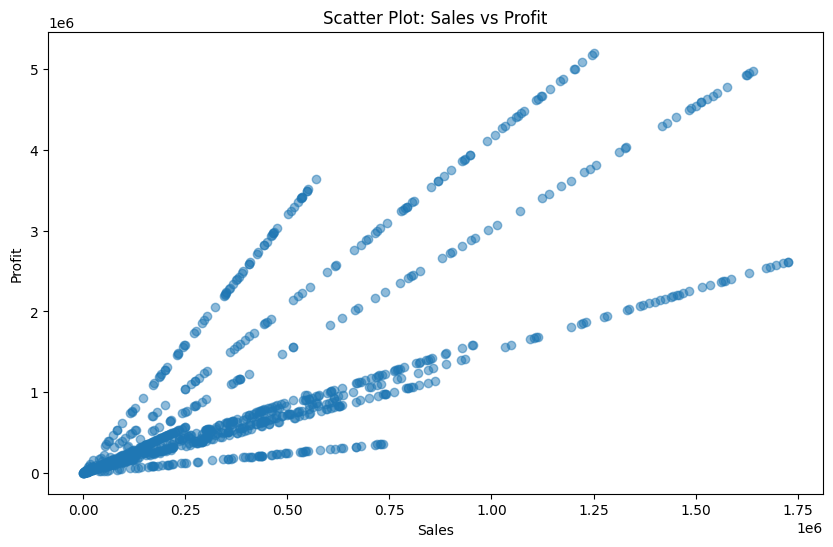

In [ ]:
#visualization
import matplotlib.pyplot as plt

# Scatter plot for 'Sales' vs 'Profit'
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Profit'], data['Total Cost'], alpha=0.5)
plt.title('Scatter Plot: Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


<ipython-input-75-c721e6960857>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total Profit', data=data, palette='viridis')


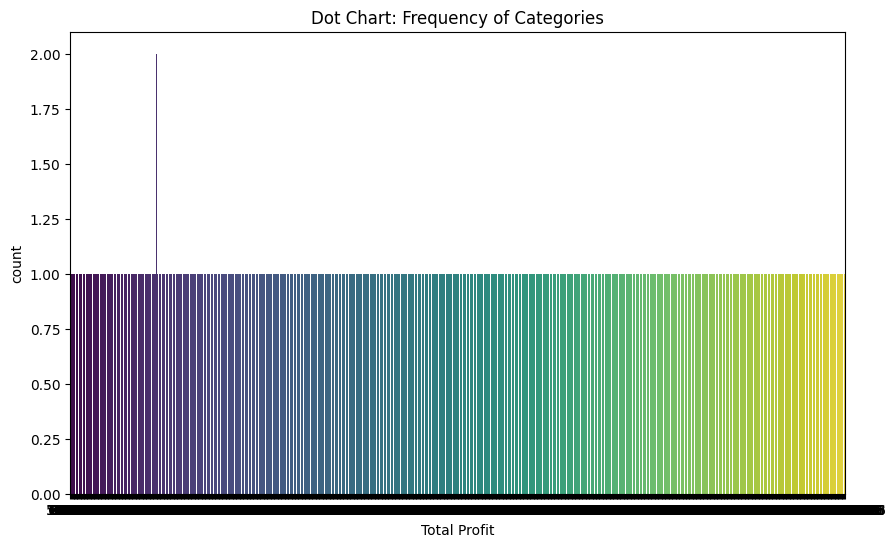

In [ ]:


# Dot chart for 'Category' counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Total Profit', data=data, palette='viridis')
plt.title('Dot Chart: Frequency of Categories')
plt.show()


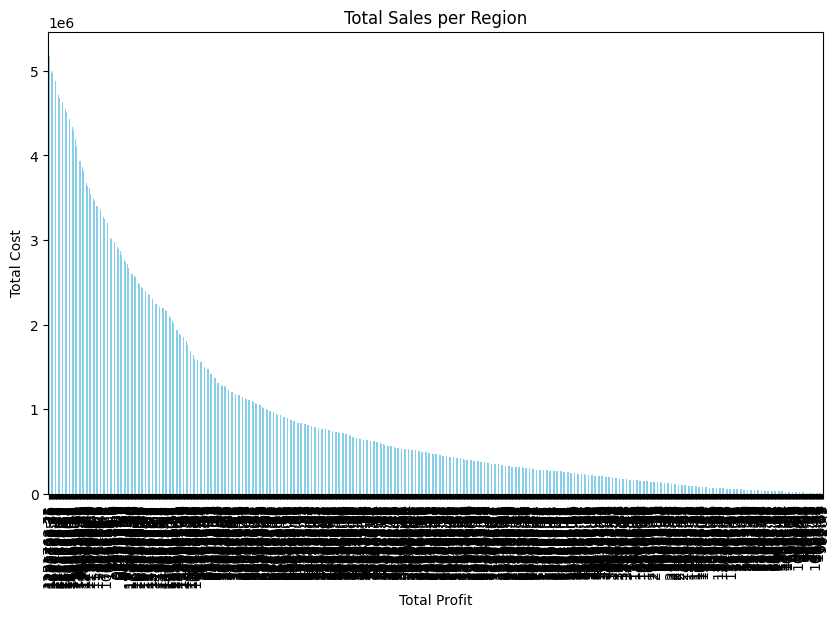

In [ ]:
# Bar plot for the total 'Sales' per 'Region'
sales_by_region = data.groupby('Total Profit')['Total Cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Total Profit')
plt.ylabel('Total Cost')
plt.show()


**MOD 5**

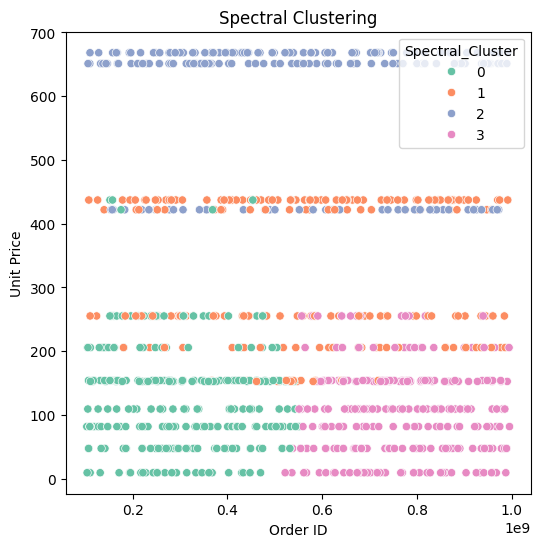

In [ ]:
# 1. Spectral Clustering
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
# Preprocessing: Selecting numerical columns for clustering and standardizing them
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_columns].dropna()  # Drop any rows with missing values for simplicity
X_scaled = StandardScaler().fit_transform(X)

spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
data['Spectral_Cluster'] = spectral.fit_predict(X_scaled)
# Visualizing Spectral Clustering Results
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data[numerical_columns[0]], y=data[numerical_columns[1]], hue=data['Spectral_Cluster'], palette="Set2")
plt.title('Spectral Clustering')
plt.show()

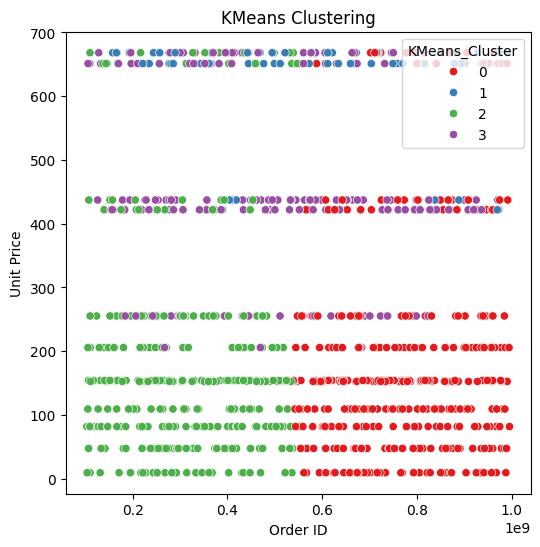

In [ ]:
# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing KMeans Clustering Results
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data[numerical_columns[0]], y=data[numerical_columns[1]], hue=data['KMeans_Cluster'], palette="Set1")
plt.title('KMeans Clustering')
plt.show()


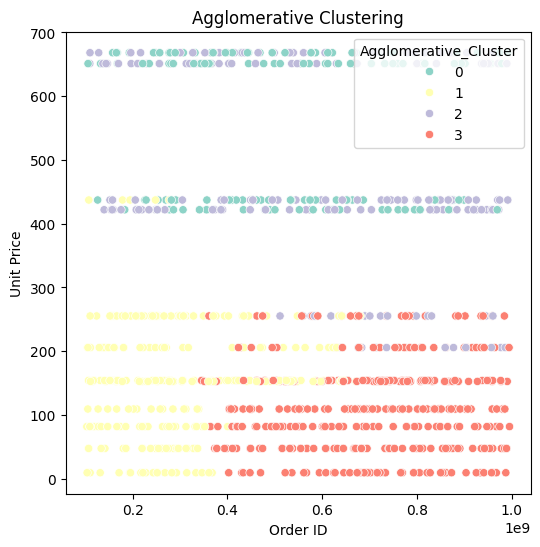

In [ ]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualizing Agglomerative Clustering Results
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data[numerical_columns[0]], y=data[numerical_columns[1]], hue=data['Agglomerative_Cluster'], palette="Set3")
plt.title('Agglomerative Clustering')
plt.show()


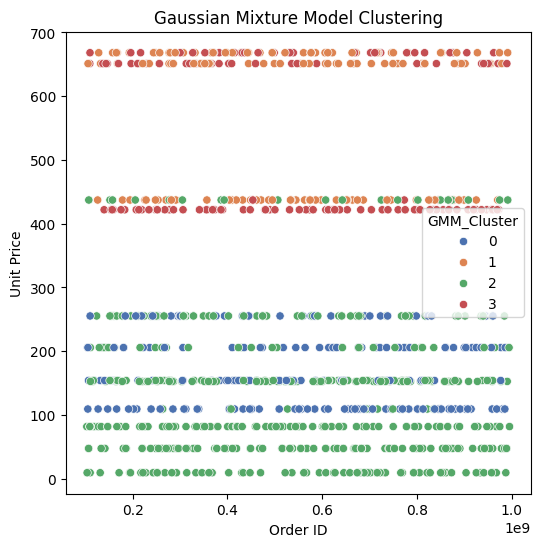

In [ ]:

# Gaussian Mixture Model (Expectation-Maximization)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Visualizing GMM Clustering Results
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data[numerical_columns[0]], y=data[numerical_columns[1]], hue=data['GMM_Cluster'], palette="deep")
plt.title('Gaussian Mixture Model Clustering')
plt.show()


In [ ]:
# Silhouette Score for KMeans Clustering
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, data['KMeans_Cluster'])
print(f"Silhouette Score for KMeans: {sil_score}")


Silhouette Score for KMeans: 0.3231607911417242


In [ ]:
# Ensure that the index is numeric
data.reset_index(drop=True, inplace=True)

# Marking outliers
outliers = np.where(distances.min(axis=1) > np.percentile(distances.min(axis=1), 95))[0]

# Adding the 'Outlier' column and assigning values
data['Outlier'] = 0  # Initially setting all values to 0 (not outliers)
data.loc[outliers, 'Outlier'] = 1  # Assigning outliers as 1

# Print outliers detected
print("Outliers detected at indices:", outliers)


Outliers detected at indices: [ 12  47  60 117 136 183 261 264 274 279 300 346 359 362 380 382 384 410
 419 432 439 442 454 456 476 481 488 503 509 512 561 575 590 612 672 720
 726 745 752 765 787 801 807 817 865 876 891 899 904 983]


**MOD 6**

PCA(n_components=2)
[[ 3.6549723  -0.93621984]
 [-0.87036379 -0.01510557]
 [-0.80988205  0.19684075]
 ...
 [ 0.42919526 -1.62265851]
 [ 7.15783323 -0.75085671]
 [-1.22794385  0.22253346]]


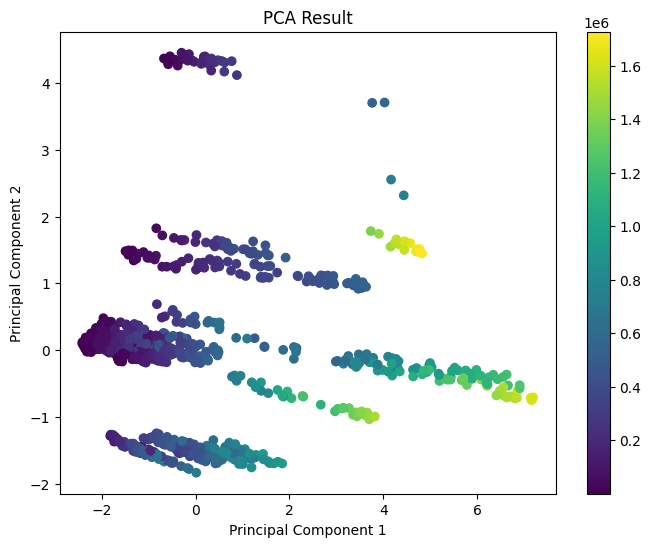

In [ ]:
#Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)
print(pca)
print(pca_result)
# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Total Profit'], cmap='viridis')  # Replace 'Category' with an appropriate column
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


TruncatedSVD()
[[ 3.6549723  -0.93621984]
 [-0.87036379 -0.01510557]
 [-0.80988205  0.19684075]
 ...
 [ 0.42919526 -1.62265851]
 [ 7.15783323 -0.75085671]
 [-1.22794385  0.22253346]]


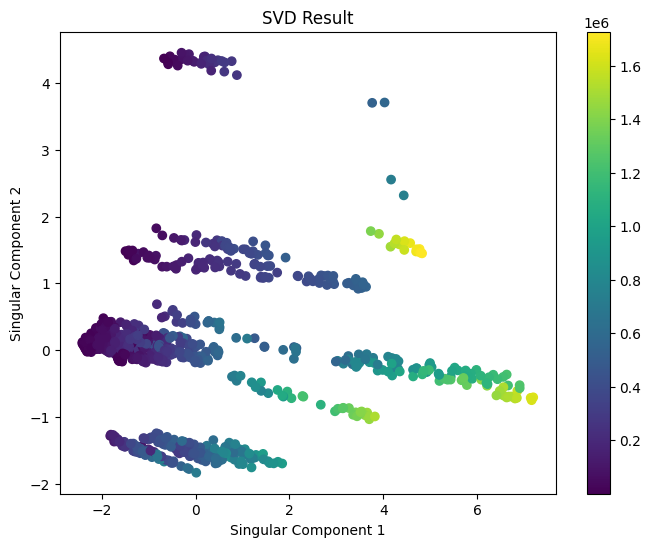

In [ ]:
#Singular Value Decomposition (SVD)
from sklearn.decomposition import TruncatedSVD

# Apply SVD (equivalent to PCA for dimensionality reduction)
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_data)
print(svd)
print(svd_result)

# Plot the SVD result
plt.figure(figsize=(8, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c=data['Total Profit'], cmap='viridis')  # Replace 'Category' with an appropriate column
plt.title('SVD Result')
plt.xlabel('Singular Component 1')
plt.ylabel('Singular Component 2')
plt.colorbar()
plt.show()


FactorAnalysis(n_components=2)
[[ 1.5591419   2.9948154 ]
 [-0.58011002 -0.03124946]
 [-0.63073444 -0.18328759]
 ...
 [ 0.08663843  0.98998233]
 [ 3.51198783  0.28778435]
 [-0.40842146  0.31687143]]


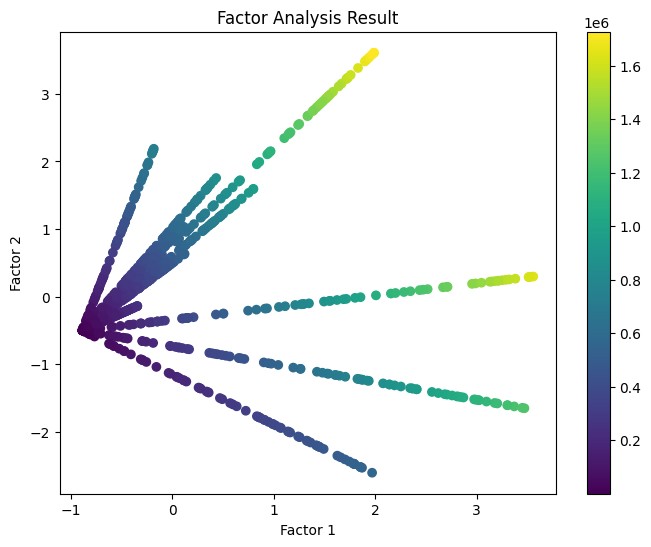

In [ ]:
#Factor Analysis
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
print(fa)
fa_result = fa.fit_transform(scaled_data)
print(fa_result)

# Plot the Factor Analysis result
plt.figure(figsize=(8, 6))
plt.scatter(fa_result[:, 0], fa_result[:, 1], c=data['Total Profit'], cmap='viridis')  # Replace 'Category' with an appropriate column
plt.title('Factor Analysis Result')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.colorbar()
plt.show()


MDS()
[[ 2.00182506 -3.62157368]
 [ 0.24797924  1.66334222]
 [ 0.26849775  1.51201243]
 ...
 [-0.36699701 -1.61895917]
 [ 5.68077586 -4.79440773]
 [-1.78487898  0.33136583]]


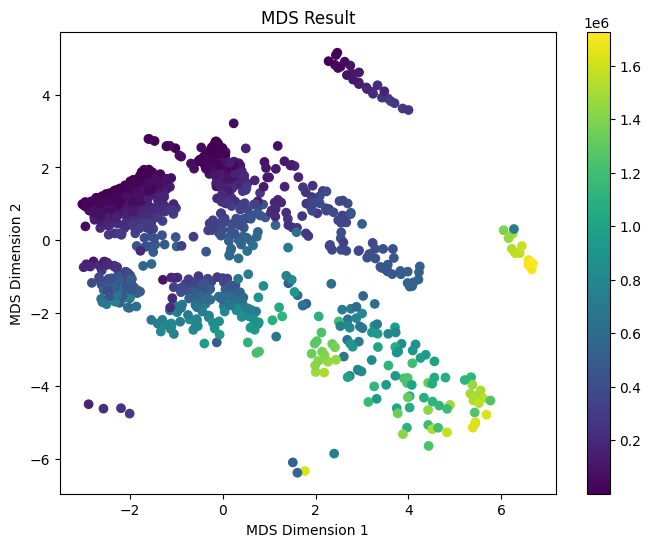

In [ ]:
#rMultidimensional Scaling (MDS)
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2)
print(mds)
mds_result = mds.fit_transform(scaled_data)
print(mds_result)


# Plot the MDS result
plt.figure(figsize=(8, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c=data['Total Profit'], cmap='viridis')  # Replace 'Category' with an appropriate column
plt.title('MDS Result')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.colorbar()
plt.show()


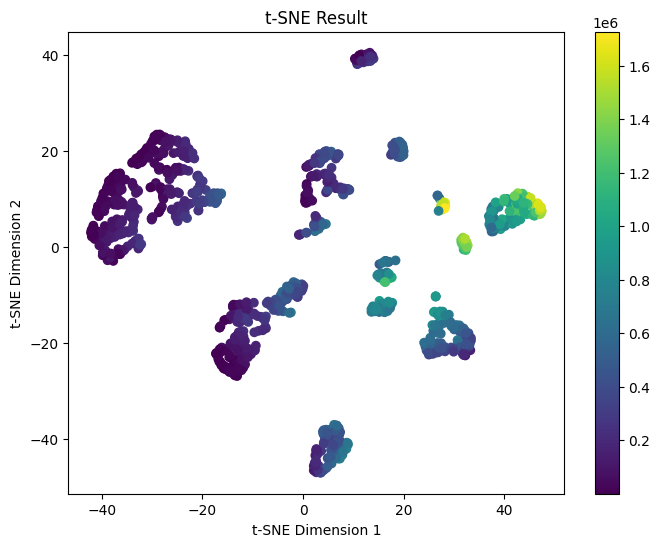

In [ ]:
#Manifold Learning (t-SNE)
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['Total Profit'], cmap='viridis')  # Replace 'Category' with an appropriate column
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=12e79fd3625d53e46f79bc8607c28dc256e29594f5d6280a8e02f3e7261bb6ee
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


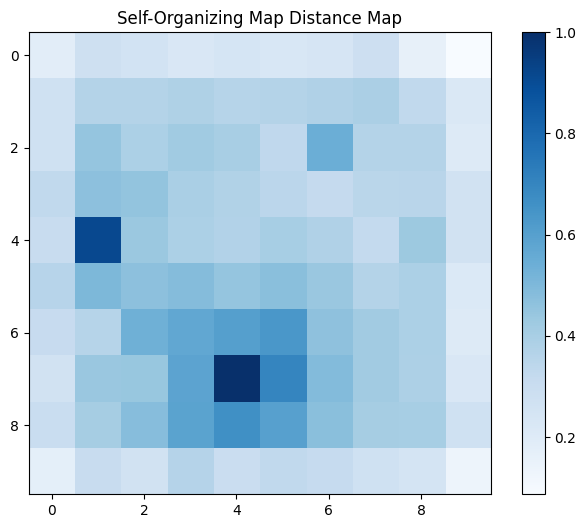

In [ ]:
#Self-Organizing Maps (SOM)
!pip install minisom  # Install the minisom library if not already installed

from minisom import MiniSom

# Apply SOM (Self-Organizing Map)
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train(scaled_data, 100)

# Plot SOM result
plt.figure(figsize=(8, 6))
plt.imshow(som.distance_map().T, cmap='Blues')  # Visualize the distance map
plt.colorbar()
plt.title('Self-Organizing Map Distance Map')
plt.show()


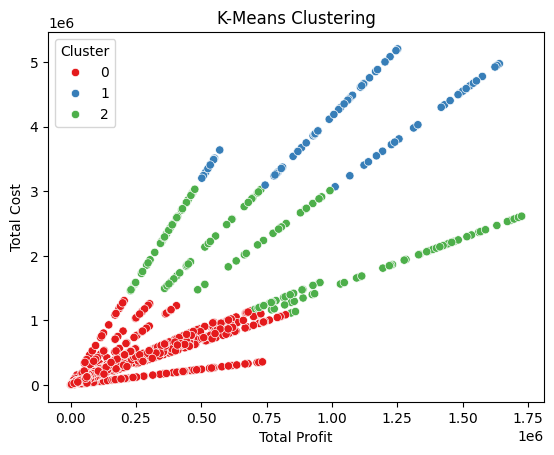

In [ ]:
 #K-Means Clustering:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Total Cost', 'Total Profit']])
sns.scatterplot(x='Total Profit', y='Total Cost', hue='Cluster', data=data, palette='Set1')
plt.title('K-Means Clustering')
plt.show()


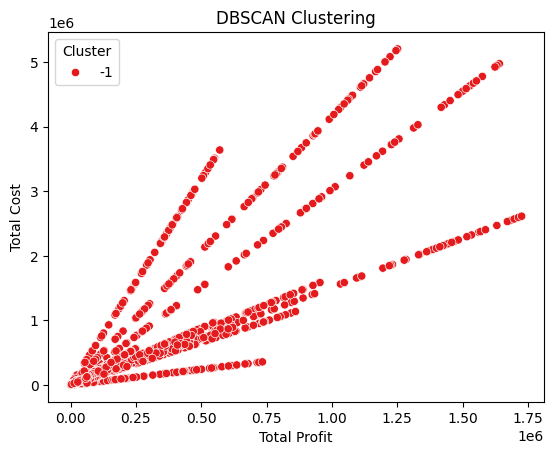

In [ ]:
#DBSCAN:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data[['Total Profit', 'Total Cost']])
sns.scatterplot(x='Total Profit', y='Total Cost', hue='Cluster', data=data, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()


**MOD 7**


In [ ]:
#Linear Regression Model:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Select features and target
features = df[['Total Cost', 'Total Profit', 'Unit Cost']]  # Example features (adjust as needed)
target = df['Units Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1601.9217576628914
Mean Squared Error: 3885004.262205299
R-squared: 0.5479004404017354


In [ ]:
#Simple Q-Learning Example:
import numpy as np

# Define the environment for Q-Learning
n_actions = 4  # Actions: move left, right, up, down
n_states = 5   # Example state space: 5 positions

# Q-table initialization
Q = np.zeros((n_states, n_actions))

# Set the parameters for Q-learning
learning_rate = 0.1  # Alpha
discount_factor = 0.9  # Gamma
n_episodes = 1000  # Number of episodes for training

# Example rewards for actions at each state
rewards = np.array([[0, -1, 0, 1], [0, 0, -1, 0], [1, 0, -1, 0], [0, 0, 1, 0], [0, -1, 0, 1]])

# Q-learning algorithm
for episode in range(n_episodes):
    state = np.random.randint(n_states)  # Start at a random state

    for _ in range(100):  # Limit steps per episode
        action = np.argmax(Q[state])  # Choose action with highest Q-value

        # Get next state and reward (in a real environment, this would depend on state-action)
        next_state = (state + 1) % n_states  # Example: state transitions to the next state
        reward = rewards[state, action]  # Reward for action taken

        # Q-value update rule
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state]) - Q[state, action])

        state = next_state  # Transition to the next state

# Print Q-table after training
print(Q)


[[1.97797368 0.         0.         0.        ]
 [2.19774853 0.         0.         0.        ]
 [2.44194281 0.         0.         0.        ]
 [1.60215868 0.         0.         0.        ]
 [1.78017631 0.         0.         0.        ]]


In [ ]:
# Linear Regression Model Construction:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model)
print(y_pred)

LinearRegression()
[ 2784.53984716  4506.86928251  4822.73266794  6779.51278991
  2893.260743    3881.64166581  4073.51906142  5153.0507938
  4476.30860947 -1259.41630425  2687.61993573  4494.16881686
  4863.33785836  4855.8230376   5655.87564166   378.7923866
  1384.46664644  3757.16690968  3913.2172336   5360.1186014
  4652.07894126  4362.22700611  4259.10165275  6058.25401542
 10905.77439753  3824.91636471  4504.31688517  4803.53028279
  3401.70801879  4911.61664581  9290.78413766  3626.18965696
  6150.88406132  4603.94875261  4442.33648681  4466.83119293
  4677.44369124  3661.71506476  1575.27472035  4164.27719207
  2862.52138509  4487.38618663  4600.03999789  6518.0424824
  7400.38812706  1251.37191695  6876.34254462  6274.16375476
 -1396.74285836  3884.85345323  4589.61489707  4967.57557453
   468.95628576  4935.41547589  4241.3168072   4397.8425843
  4811.78145222  4904.13411057  4585.18284067  4691.18844958
  8690.47517551  4611.04674003  7871.18387824  5622.00736544
  5952.393

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 1971.0414156494273


In [ ]:
 #Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores: {scores}")


Cross-Validation Scores: [-3898194.52553753 -3267280.68609955 -3543955.2474452  -3539010.73394024
 -3797467.25037109]


In [ ]:
#Regularization (Ridge and Lasso Regression):
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
print(lasso)


Lasso(alpha=0.1)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(rf_model)
print(y_pred_rf)

RandomForestRegressor()
[ 431.03 3822.2  3907.68 8117.76 2344.5  4275.77 1890.09 5382.44 3670.16
  423.58  305.26 5160.8  3751.36 2874.71 5873.3  1548.37 2263.19 2730.37
 4012.5  4772.69 9774.84 2935.13  722.54 7710.34 9029.31 1211.21 3171.26
 2691.04 1575.33 4296.59 8304.73 4307.58 7981.27 7319.64 2963.85  351.4
 2166.21 1342.83  510.16 1935.93  518.01 1368.51 7204.37 8980.25 6373.99
 1429.23 7854.54 8295.36  374.12 1359.65 4236.36 3402.9  1580.35 7478.07
  591.27 2217.18 5879.32 2916.48 6417.19 4007.22 7759.85 7708.07 7395.82
 6477.09 7904.25 1586.53 8382.67 3299.34 8696.76 5832.52  430.74  607.56
   72.34 3875.32 8609.37 5300.98  284.68 6501.81 4845.83 6751.94 2912.69
 8321.04 6295.82 2158.57  832.86 7298.1  9677.15 4789.48 2487.04 3664.24
 9335.02  750.03  351.4  5010.55  758.07 4880.64 5551.47 3957.1  8980.25
 2302.57 5507.18 4161.   2595.45 5083.35 3480.04 9719.69 9729.05 8250.
 4187.92 7981.28 1910.15 7881.13 4726.07  250.01 1633.26 9877.81 2046.04
 2002.4  1611.47 7032.97 9325.